In [2]:
!pip install kaggle

In [3]:
# Configuring thepath of kaggle.json file

!mkdir ~p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [4]:
# Importing the dataset

!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# Extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Dataset Extracted')

Dataset Extracted


In [6]:
!ls

 data   face-mask-dataset.zip   kaggle.json  '~p'   sample_data


**Dependencies**

In [7]:
import os                                   # To walk through path
import numpy as np                          # To perform numerical operations
import pandas as pd                         # To perform data processing
import matplotlib.pyplot as plt             # To visualize the data
import matplotlib.image as mpimg            # Visualization
import cv2                                  # Comuter vision oprations
from google.colab.patches import cv2_imshow # Computer vision
from PIL import Image
from sklearn.model_selection import train_test_split  # To seperate features and label
import tensorflow as tf
from tensorflow import keras

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2913.jpg', 'with_mask_3176.jpg', 'with_mask_809.jpg', 'with_mask_1681.jpg', 'with_mask_3620.jpg']
['with_mask_3413.jpg', 'with_mask_3412.jpg', 'with_mask_2765.jpg', 'with_mask_3139.jpg', 'with_mask_1934.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3101.jpg', 'without_mask_2593.jpg', 'without_mask_2765.jpg', 'without_mask_2448.jpg', 'without_mask_1999.jpg']
['without_mask_737.jpg', 'without_mask_1533.jpg', 'without_mask_1667.jpg', 'without_mask_1371.jpg', 'without_mask_1388.jpg']


In [10]:
print(f'Number of with mask images : {len(with_mask_files)}')
print(f'Number of without mask images : {len(without_mask_files)}')

Number of with mask images : 3725
Number of without mask images : 3828


**Creating Labels for two class of Images**

with mask --> 1
without mask --> 0

In [11]:
# Create the labels

with_mask_labels    = [1] * 3725
without_mask_labels = [0] * 3828

In [12]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

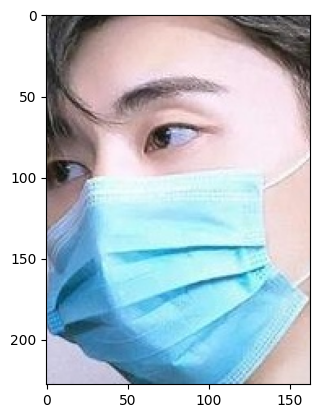

In [15]:
# Displying with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

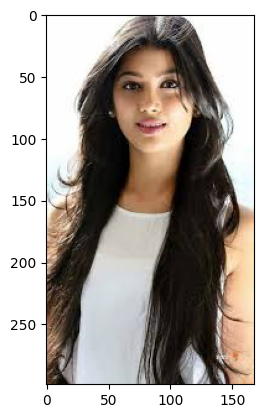

In [16]:
# Displying without mask image

img = mpimg.imread('/content/data/without_mask/without_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**



1.   Resize the Images
2.   Convert the Images to numpy arrays



In [17]:
# Convert Images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

In [20]:
data[0]

array([[[168, 188, 213],
        [178, 197, 225],
        [191, 210, 240],
        ...,
        [103, 108, 107],
        [107, 111, 110],
        [ 98, 102, 101]],

       [[168, 188, 213],
        [178, 197, 224],
        [191, 210, 239],
        ...,
        [125, 127, 126],
        [122, 124, 123],
        [109, 111, 110]],

       [[171, 191, 216],
        [179, 199, 225],
        [190, 210, 237],
        ...,
        [141, 139, 140],
        [135, 134, 135],
        [121, 120, 120]],

       ...,

       [[ 14,  19,  15],
        [ 14,  19,  15],
        [ 14,  19,  15],
        ...,
        [ 11,  12,  17],
        [ 12,  13,  18],
        [ 12,  13,  18]],

       [[ 13,  18,  14],
        [ 13,  18,  14],
        [ 13,  18,  14],
        ...,
        [  9,  10,  15],
        [ 10,  11,  16],
        [ 11,  12,  17]],

       [[ 12,  17,  13],
        [ 12,  17,  13],
        [ 12,  17,  13],
        ...,
        [  9,  10,  15],
        [ 10,  11,  16],
        [ 11,  12,  17]]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# Converting Image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


**Train-Test Split**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [31]:
X_train[0]

array([[[190, 196, 189],
        [193, 199, 190],
        [194, 202, 190],
        ...,
        [206, 208, 195],
        [206, 208, 195],
        [206, 208, 195]],

       [[192, 196, 189],
        [195, 199, 190],
        [196, 201, 190],
        ...,
        [206, 208, 195],
        [206, 208, 195],
        [206, 208, 195]],

       [[196, 198, 191],
        [198, 200, 192],
        [198, 200, 190],
        ...,
        [210, 209, 197],
        [210, 209, 197],
        [208, 207, 195]],

       ...,

       [[161, 153, 142],
        [166, 157, 146],
        [171, 159, 151],
        ...,
        [ 22, 172, 198],
        [ 20, 165, 192],
        [ 21, 161, 189]],

       [[165, 153, 145],
        [171, 159, 150],
        [174, 162, 154],
        ...,
        [ 30, 175, 204],
        [ 35, 175, 205],
        [ 41, 175, 206]],

       [[169, 154, 147],
        [173, 158, 151],
        [173, 161, 152],
        ...,
        [ 37, 182, 213],
        [ 44, 184, 215],
        [ 51, 184, 216]]

In [32]:
X_train_scaled[0]

array([[[0.74509804, 0.76862745, 0.74117647],
        [0.75686275, 0.78039216, 0.74509804],
        [0.76078431, 0.79215686, 0.74509804],
        ...,
        [0.80784314, 0.81568627, 0.76470588],
        [0.80784314, 0.81568627, 0.76470588],
        [0.80784314, 0.81568627, 0.76470588]],

       [[0.75294118, 0.76862745, 0.74117647],
        [0.76470588, 0.78039216, 0.74509804],
        [0.76862745, 0.78823529, 0.74509804],
        ...,
        [0.80784314, 0.81568627, 0.76470588],
        [0.80784314, 0.81568627, 0.76470588],
        [0.80784314, 0.81568627, 0.76470588]],

       [[0.76862745, 0.77647059, 0.74901961],
        [0.77647059, 0.78431373, 0.75294118],
        [0.77647059, 0.78431373, 0.74509804],
        ...,
        [0.82352941, 0.81960784, 0.77254902],
        [0.82352941, 0.81960784, 0.77254902],
        [0.81568627, 0.81176471, 0.76470588]],

       ...,

       [[0.63137255, 0.6       , 0.55686275],
        [0.65098039, 0.61568627, 0.57254902],
        [0.67058824, 0

**Building a Cnvolutional Neural Network**

In [33]:
no_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation= 'relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_of_classes, activation='sigmoid'))


In [34]:
# Compile the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# Training the Neural Network

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=25)

Epoch 1/25
170/170 [==============================] - 15s 21ms/step - loss: 0.4691 - acc: 0.7986 - val_loss: 0.3008 - val_acc: 0.8793
Epoch 2/25
170/170 [==============================] - 3s 16ms/step - loss: 0.2918 - acc: 0.8838 - val_loss: 0.2464 - val_acc: 0.9041
Epoch 3/25
170/170 [==============================] - 3s 16ms/step - loss: 0.2336 - acc: 0.9031 - val_loss: 0.2161 - val_acc: 0.9041
Epoch 4/25
170/170 [==============================] - 3s 18ms/step - loss: 0.2012 - acc: 0.9233 - val_loss: 0.2801 - val_acc: 0.8777
Epoch 5/25
170/170 [==============================] - 3s 16ms/step - loss: 0.1865 - acc: 0.9288 - val_loss: 0.1997 - val_acc: 0.9174
Epoch 6/25
170/170 [==============================] - 3s 16ms/step - loss: 0.1485 - acc: 0.9404 - val_loss: 0.1857 - val_acc: 0.9339
Epoch 7/25
170/170 [==============================] - 3s 17ms/step - loss: 0.1295 - acc: 0.9537 - val_loss: 0.1837 - val_acc: 0.9372
Epoch 8/25
170/170 [==============================] - 3s 17ms/step -

**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f'Test Accuracy = {accuracy}')

48/48 [==============================] - 0s 9ms/step - loss: 0.3453 - acc: 0.9437
Test Accuracy = 0.9437458515167236


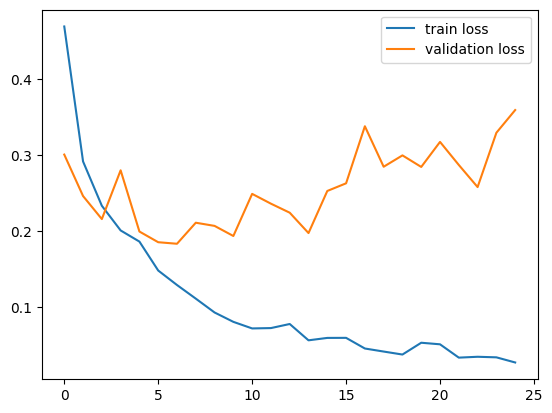

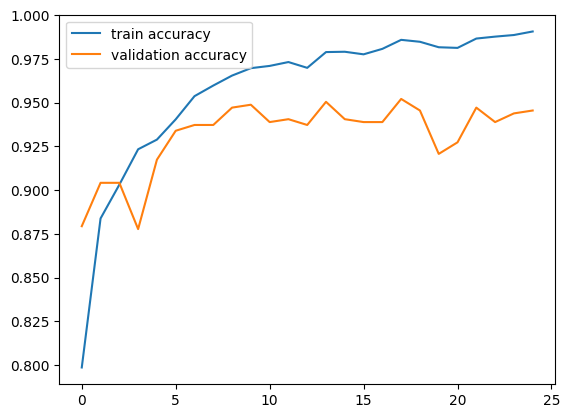

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test.jpeg


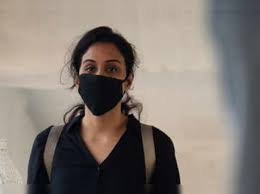

1/1 [==============================] - 0s 177ms/step
[[0.18642323 0.79056203]]
1
The person in the image is wearing a mask


In [42]:
import cv2

from google.colab.patches import cv2_imshow

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')